# Topic modelling of Lenovo mobile reviews (LDA)

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
import pandas as pd

In [2]:
#import data
appStore = pd.read_csv('AppStoreData.csv')
googlePlay = pd.read_csv('PlayStoreData.csv')

In [8]:
#combine review data 
as_review = appStore['review']
gp_review = googlePlay['text']

reviews = as_review.tolist() + gp_review.tolist()

In [9]:
print(reviews)

['Great banking app with attractive interest rates! Please allow us to add and/or save payees so we don’t have to keep typing out UEN numbers or account numbers. Would be nice to be able to add the debit card to Apple Pay too!!', 'A bank like no other, no bank have such amazing feature to separate your money into different “pockets” to keep track of your goals. Moreover the interest rate they give is the highest for the no effort! Interest are being deposit daily and it’s amazing to see 💵 coming in to the bank daily! \n\nThe user interfaces is so intuitive that every button can be found with your eyes close, that makes money transfer so much smoother. Also the colours is so slick that I want to turn the app on everyday just to look at it and see the daily interest\n\nLots of potential for the product and I can’t wait to see more of it.', 'Notice that the drop in interest rate of 0.8% in saving accounts. GXS just come out with a reason to say many consumers want a increase in interest r

In [5]:
#VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize lists to store data
review_texts = []
positive_scores = []
negative_scores = []
neutral_scores = []
compound_scores = []
nps_indiv = []
nps_category = []  # New column for NPS categories

# Perform sentiment analysis and store scores in lists
for review in reviews:
    vs = analyzer.polarity_scores(review)
    review_texts.append(review)
    positive_scores.append(vs['pos'])
    negative_scores.append(vs['neg'])
    neutral_scores.append(vs['neu'])
    compound_scores.append(vs['compound'])
    
    # Map compound scores to nps_indiv based on specified intervals
    if -1 <= vs['compound'] <= -9/11:
        nps_indiv.append(0)
    elif -9/11 < vs['compound'] <= -7/11:
        nps_indiv.append(1)
    elif -7/11 < vs['compound'] <= -5/11:
        nps_indiv.append(2)
    elif -5/11 < vs['compound'] <= -3/11:
        nps_indiv.append(3)
    elif -3/11 < vs['compound'] <= -1/11:
        nps_indiv.append(4)
    elif -1/11 < vs['compound'] <= 1/11:
        nps_indiv.append(5)
    elif 1/11 < vs['compound'] <= 3/11:
        nps_indiv.append(6)
    elif 3/11 < vs['compound'] <= 5/11:
        nps_indiv.append(7)
    elif 5/11 < vs['compound'] <= 7/11:
        nps_indiv.append(8)
    elif 7/11 < vs['compound'] <= 9/11:
        nps_indiv.append(9)
    else:
        nps_indiv.append(10)
    
    # Map nps_indiv scores to NPS categories
    if nps_indiv[-1] >= 9:  # Promoters
        nps_category.append('Promoter')
    elif nps_indiv[-1] >= 7:  # Passives
        nps_category.append('Passive')
    else:  # Detractors
        nps_category.append('Detractor')

# Create dataframe
score_df = pd.DataFrame({
    'Review': review_texts,
    'Positive Score': positive_scores,
    'Negative Score': negative_scores,
    'Neutral Score': neutral_scores,
    'Compound Score': compound_scores,
    'nps_indiv': nps_indiv,
    'nps_category': nps_category  
})

# Display the dataframe
print(score_df)

                                                Review  Positive Score  \
0    Great banking app with attractive interest rat...           0.367   
1    A bank like no other, no bank have such amazin...           0.147   
2    Notice that the drop in interest rate of 0.8% ...           0.201   
3    Sending money into my GXS account is a breeze ...           0.059   
4    I have to say that the UI/UX is one of the bes...           0.141   
..                                                 ...             ...   
413  Not ready to roll out completely. Aint even al...           0.115   
414                                       Can't work .           0.000   
415  Can not download yet, just always show pending...           0.000   
416  Looks cool and sleek! Can I get an invite if I...           0.208   
417  It's doesn't work, they're just trying to coll...           0.079   

     Negative Score  Neutral Score  Compound Score  nps_indiv nps_category  
0             0.024          0.609

In [6]:
#NPS (pretend the topic splitting actually works)
import pandas as pd
import numpy as np

def net_promoter_score(score_df, topic_column):
    topics = score_df[topic_column].unique()  # Get unique topics from the specified column
    topic_results = {}  # Dictionary to store results for each topic

    for topic in topics:
        # Filter the DataFrame for the current topic
        topic_df = score_df[score_df[topic_column] == topic]

        # Count the occurrences of each label
        label_counts = topic_df['nps_category'].value_counts()

         # Calculate Net Promoter Score (NPS)
        promoter_count = label_counts.get('Promoter', 0)
        detractor_count = label_counts.get('Detractor', 0)
        passive_count = label_counts.get('Passive', 0)
        total_count = promoter_count + detractor_count + passive_count

        # Calculate NPS
        nps = ((promoter_count - detractor_count) / total_count) * 100

        # Store the result for the current category
        topic_results[topic] = round(nps, 2)

    return topic_results

# Example usage
example=score_df.loc[:9]
TOPICS = ['A', 'B']
example['Topic'] = np.random.choice(TOPICS, size=len(score_df.loc[:9])) 
print(example)


grouped_df = example.groupby('Topic')
for name, group in grouped_df:
    print(f"Topic: {name}")
    print(group)
    print()

# Calculate the percentage difference by category
nps_score = net_promoter_score(example, 'Topic')
print("NPS Score by topic:")
print(nps_score)


                                              Review  Positive Score  \
0  Great banking app with attractive interest rat...           0.367   
1  A bank like no other, no bank have such amazin...           0.147   
2  Notice that the drop in interest rate of 0.8% ...           0.201   
3  Sending money into my GXS account is a breeze ...           0.059   
4  I have to say that the UI/UX is one of the bes...           0.141   
5  Have been waiting for a slot for the account s...           0.206   
6  Great app, with awesome design and theme unlik...           0.265   
7  Hit with fast reversal when transferring money...           0.099   
8  Very easy to use, user friendly and intuitive....           0.355   
9  What a joke! Nothing happens after you input y...           0.175   

   Negative Score  Neutral Score  Compound Score  nps_indiv nps_category Topic  
0           0.024          0.609          0.9622         10     Promoter     B  
1           0.051          0.801          0.9

/var/folders/1l/pycwvg157rv_sn0s68n1_y8c0000gn/T/ipykernel_89797/268640162.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['Topic'] = np.random.choice(TOPICS, size=len(score_df.loc[:9]))


Topic filtering part

In [7]:
review_data = pd.DataFrame(reviews, columns= ['review'])

In [8]:
review_data.head()

,review
0,Great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin..."
2,Notice that the drop in interest rate of 0.8% ...
3,Sending money into my GXS account is a breeze ...
4,I have to say that the UI/UX is one of the bes...


# Data Pre-Processing
### 1. Replacing/Dropping NULL values

In [9]:
review_data.isnull().sum()

# Since our data has no null values will be skip this step

review    0
dtype: int64

### 2. Converting to LOWER case

In [10]:
review_data['clean_review'] = review_data['review'].apply(lambda x: str(x).lower())
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin...","a bank like no other, no bank have such amazin..."
2,Notice that the drop in interest rate of 0.8% ...,notice that the drop in interest rate of 0.8% ...
3,Sending money into my GXS account is a breeze ...,sending money into my gxs account is a breeze ...
4,I have to say that the UI/UX is one of the bes...,i have to say that the ui/ux is one of the bes...


### 3. REMOVE NON-ALPHA DATA(DIGITS,PUNCTUATIONS,DIACRITICS)

In [11]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True) 
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin...",a bank like no other no bank have such amazin...
2,Notice that the drop in interest rate of 0.8% ...,notice that the drop in interest rate of ...
3,Sending money into my GXS account is a breeze ...,sending money into my gxs account is a breeze ...
4,I have to say that the UI/UX is one of the bes...,i have to say that the ui ux is one of the bes...


### 4. REMOVING WHITE SPACE

In [12]:
review_data['clean_review'] = review_data['clean_review'].str.replace(r'\s{2,}', ' ',regex=True)
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,great banking app with attractive interest rat...
1,"A bank like no other, no bank have such amazin...",a bank like no other no bank have such amazing...
2,Notice that the drop in interest rate of 0.8% ...,notice that the drop in interest rate of in sa...
3,Sending money into my GXS account is a breeze ...,sending money into my gxs account is a breeze ...
4,I have to say that the UI/UX is one of the bes...,i have to say that the ui ux is one of the bes...


### 5. WORD TOKENIZATION

In [13]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/blabbyduck/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
review_data['clean_review'] = review_data['clean_review'].apply(lambda x: word_tokenize(x))
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[great, banking, app, with, attractive, intere..."
1,"A bank like no other, no bank have such amazin...","[a, bank, like, no, other, no, bank, have, suc..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, that, the, drop, in, interest, rate, ..."
3,Sending money into my GXS account is a breeze ...,"[sending, money, into, my, gxs, account, is, a..."
4,I have to say that the UI/UX is one of the bes...,"[i, have, to, say, that, the, ui, ux, is, one,..."


### 6. REMOVE UNNECESSARY WORDS

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blabbyduck/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x:[word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()])
review_data.head()


,review,clean_review
0,Great banking app with attractive interest rat...,"[great, banking, attractive, interest, rates, ..."
1,"A bank like no other, no bank have such amazin...","[bank, like, bank, amazing, feature, separate,..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, saving, account..."
3,Sending money into my GXS account is a breeze ...,"[sending, money, account, breeze, instantaneou..."
4,I have to say that the UI/UX is one of the bes...,"[best, seen, digibank, mobile, finally, strong..."


In [17]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

### 7. LEMMATIZATION

In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/blabbyduck/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[great, banking, attractive, interest, rate, p..."
1,"A bank like no other, no bank have such amazin...","[bank, like, bank, amazing, feature, separate,..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, saving, account..."
3,Sending money into my GXS account is a breeze ...,"[sending, money, account, breeze, instantaneou..."
4,I have to say that the UI/UX is one of the bes...,"[best, seen, digibank, mobile, finally, strong..."


### 8. Extracting only NOUN

In [20]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/blabbyduck/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
review_data['clean_review'] = review_data['clean_review'].apply\
(lambda x: [word for word in x if nltk.pos_tag([word])[0][1] == 'NN'])

In [22]:
review_data = review_data[review_data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

In [23]:
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[banking, interest, rate, please, payee, numbe..."
1,"A bank like no other, no bank have such amazin...","[bank, bank, feature, money, pocket, track, go..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, account, reason..."
3,Sending money into my GXS account is a breeze ...,"[money, account, breeze, amount, fund, money, ..."
4,I have to say that the UI/UX is one of the bes...,"[digibank, mobile, market, player, focus, cust..."


### 9. Document Term Matrix

In [24]:
import gensim
from gensim import corpora

In [25]:
dictionary = corpora.Dictionary(review_data['clean_review'])
print(dictionary)

# We have 6724 unique tokens

Dictionary<738 unique tokens: ['account', 'apple', 'banking', 'card', 'debit']...>


In [26]:
doc_term_matrix = review_data['clean_review'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

# Each tokenized words has been assigned index value and thier count in corpus

0    [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...
1    [(5, 3), (9, 1), (10, 3), (11, 1), (12, 1), (1...
2    [(0, 9), (5, 7), (9, 6), (10, 1), (34, 1), (35...
3    [(0, 2), (2, 1), (8, 1), (23, 2), (30, 1), (43...
4    [(2, 1), (8, 1), (10, 1), (26, 1), (33, 1), (6...
5    [(0, 1), (10, 4), (42, 1), (61, 1), (83, 1), (...
6    [(2, 1), (5, 1), (9, 1), (10, 1), (32, 1), (74...
7    [(2, 1), (7, 1), (10, 3), (17, 1), (23, 1), (3...
8    [(17, 1), (25, 1), (32, 1), (33, 1), (74, 1), ...
9    [(0, 2), (6, 1), (8, 1), (10, 3), (21, 1), (56...
Name: clean_review, dtype: object

### LDA

In [27]:
from IPython.display import clear_output

In [28]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=45)
clear_output()

# corpus requires document term matrix
# num_topics is used to define number of topics to create from corpus
# id2word requires mapping of words
# passes is used to define number of iterations

In [29]:
ldamodel.print_topics()

# We have printed all 12 topics and their keywords generated by LDA

[(0,
  '0.028*"bank" + 0.024*"time" + 0.024*"user" + 0.021*"loan" + 0.021*"account" + 0.017*"phone" + 0.016*"experience" + 0.012*"joke" + 0.012*"security" + 0.012*"waste"'),
 (1,
  '0.149*"interest" + 0.101*"rate" + 0.036*"account" + 0.020*"bank" + 0.020*"loan" + 0.018*"download" + 0.018*"increase" + 0.017*"pocket" + 0.013*"point" + 0.012*"money"'),
 (2,
  '0.056*"sign" + 0.030*"account" + 0.026*"bank" + 0.015*"grab" + 0.015*"help" + 0.015*"download" + 0.014*"reason" + 0.012*"time" + 0.011*"fund" + 0.011*"feature"'),
 (3,
  '0.042*"sign" + 0.042*"account" + 0.034*"interest" + 0.028*"month" + 0.025*"list" + 0.021*"rating" + 0.021*"time" + 0.019*"rate" + 0.012*"number" + 0.012*"card"'),
 (4,
  '0.036*"account" + 0.031*"bank" + 0.028*"experience" + 0.023*"time" + 0.021*"phone" + 0.020*"banking" + 0.019*"deposit" + 0.016*"please" + 0.016*"launch" + 0.012*"error"'),
 (5,
  '0.058*"bank" + 0.037*"rate" + 0.033*"money" + 0.032*"account" + 0.016*"interest" + 0.015*"work" + 0.011*"transfer" + 0

### Visualizing LDA model topics

In [30]:
import pyLDAvis # To visualize lda model
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)
vis

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=89797) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <numbe

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.202650  0.106934       1        1  13.374931
6      0.069616 -0.028958       2        1   9.340498
2     -0.039268 -0.112473       3        1   8.704732
10    -0.005527 -0.060753       4        1   8.634035
11     0.073602  0.080374       5        1   8.518362
5     -0.063642  0.061957       6        1   8.440251
0      0.056100 -0.068224       7        1   7.792270
4      0.063906  0.025623       8        1   7.777181
3     -0.104486 -0.073269       9        1   7.441689
8     -0.043091 -0.017410      10        1   7.318986
9      0.117510  0.101758      11        1   6.522233
7      0.077930 -0.015558      12        1   6.134831, topic_info=         Term       Freq      Total Category  logprob  loglift
5    interest  63.000000  63.000000  Default  30.0000  30.0000
9        rate  45.000000  45.000000  Default  29.0000  29.0000
103      sign  32.000000  32.000000  Default  28.0000  28.0000
67   singpass  18.000000  18.000000  Default  27.0000  27.0000
10       bank  63.000000  63.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
213      apps   0.787188  13.081027  Topic12  -5.2503  -0.0193
192      love   0.787184   9.051176  Topic12  -5.2503   0.3490
103      sign   0.787173  32.793271  Topic12  -5.2503  -0.9383
411  anything   0.780814   4.641509  Topic12  -5.2584   1.0087
415    public   0.780813   3.010328  Topic12  -5.2584   1.4417

[732 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
284       3  0.867026  accept
344       2  0.145068  access
344       3  0.145068  access
344       5  0.290135  access
344       7  0.145068  access
...     ...       ...     ...
312      12  0.449606   write
146       1  0.183882    year
146       3  0.183882    year
146       4  0.367763    year
146      10  0.183882    year

[1062 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 3, 11, 12, 6, 1, 5, 4, 9, 10, 8])

Since, some topics in above graph are overlapping each other we will try to find optimal number of topics.

In [31]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel,texts=review_data['clean_review'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())

# Compute Coherence Score


Coherence Score:  0.40468937506218156


In [32]:
# Computing coherence score for different size of topic

def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts,\
                                   dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

In [33]:
topic_num,cv_score = calculate_topic_cv(ldamodel,review_data['clean_review'],dictionary,15)

In [34]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index\
('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
14,0.407097
12,0.404689
13,0.394634
9,0.394044
10,0.390730
7,0.383016
11,0.380217
2,0.378152
8,0.377550


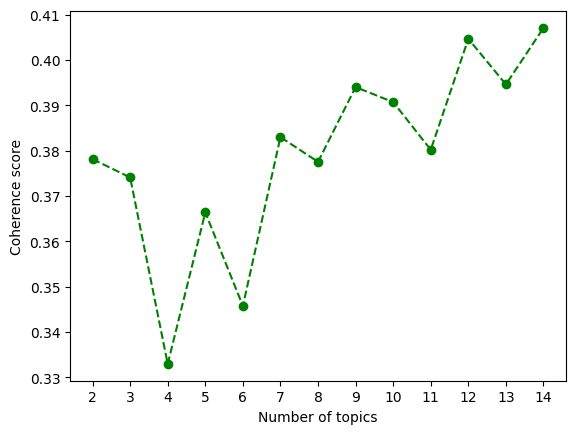

In [35]:
import matplotlib.pyplot as plt

plt.plot(topic_num,cv_score,color='green', marker='o', linestyle='dashed')
plt.xticks(range(2,15))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

### we will be going with number of topic 6 as with 8 topics there will be many overlaps .

In [36]:
# Creating LDA model with number of topics as 6

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word=dictionary, passes=10,random_state=45)
clear_output()
print(CoherenceModel(model=ldamodel,texts=review_data['clean_review'],\
                     dictionary=dictionary , coherence='c_v').get_coherence())

0.390729739594821


In [37]:
ldamodel.print_topics()

[(0,
  '0.049*"bank" + 0.026*"user" + 0.025*"loan" + 0.023*"fast" + 0.020*"experience" + 0.017*"time" + 0.017*"need" + 0.014*"joke" + 0.014*"review" + 0.014*"transfer"'),
 (1,
  '0.135*"interest" + 0.112*"rate" + 0.042*"account" + 0.024*"bank" + 0.019*"pocket" + 0.015*"sign" + 0.014*"increase" + 0.012*"point" + 0.011*"money" + 0.010*"download"'),
 (2,
  '0.048*"sign" + 0.043*"account" + 0.028*"time" + 0.022*"singpass" + 0.021*"bank" + 0.017*"transfer" + 0.017*"apps" + 0.017*"grab" + 0.016*"feature" + 0.014*"show"'),
 (3,
  '0.026*"sign" + 0.026*"account" + 0.022*"month" + 0.022*"list" + 0.022*"loan" + 0.018*"interest" + 0.018*"download" + 0.015*"time" + 0.015*"payment" + 0.015*"debit"'),
 (4,
  '0.030*"bank" + 0.026*"interest" + 0.020*"account" + 0.017*"pocket" + 0.016*"error" + 0.016*"experience" + 0.016*"please" + 0.016*"banking" + 0.014*"time" + 0.014*"offer"'),
 (5,
  '0.024*"money" + 0.024*"bank" + 0.023*"account" + 0.022*"cant" + 0.021*"work" + 0.018*"singpass" + 0.015*"phone" + 

In [38]:
pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/Library/Frameworks/Python.framework/Ve

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.223384  0.041757       1        1  14.030564
4     -0.006558  0.046869       2        1  11.850749
0      0.090233 -0.052315       3        1  11.288317
2     -0.038393 -0.056241       4        1  11.276567
6      0.030055  0.056099       5        1   9.619070
8      0.018319  0.031928       6        1   9.160399
9      0.079666  0.152391       7        1   8.913216
3     -0.044871 -0.103818       8        1   8.499599
5      0.024590 -0.029146       9        1   8.168152
7      0.070341 -0.087523      10        1   7.193365, topic_info=         Term       Freq      Total Category  logprob  loglift
5    interest  62.000000  62.000000  Default  30.0000  30.0000
9        rate  45.000000  45.000000  Default  29.0000  29.0000
10       bank  63.000000  63.000000  Default  28.0000  28.0000
32       user  20.000000  20.000000  Default  27.0000  27.0000
288      loan  20.000000  20.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
135     thank   1.027347   6.120912  Topic10  -5.1432   0.8473
229  response   0.925856   5.389926  Topic10  -5.2472   0.8704
2     banking   0.900389  16.069686  Topic10  -5.2751  -0.2499
44       grab   0.820999  13.264137  Topic10  -5.3674  -0.1503
356   payment   0.793127   5.265155  Topic10  -5.4020   0.7391

[617 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
721       8  0.660079      absurd
284       4  0.431473      accept
344       3  0.290715      access
344       4  0.145358      access
344       5  0.145358      access
...     ...       ...         ...
146       7  0.186520        year
146       8  0.373039        year
146      10  0.186520        year
485      10  0.674510  yesteryear
522       4  0.864001        zero

[907 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 3, 7, 9, 10, 4, 6, 8])

In [39]:
review_data.head()

,review,clean_review
0,Great banking app with attractive interest rat...,"[banking, interest, rate, please, payee, numbe..."
1,"A bank like no other, no bank have such amazin...","[bank, bank, feature, money, pocket, track, go..."
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, account, reason..."
3,Sending money into my GXS account is a breeze ...,"[money, account, breeze, amount, fund, money, ..."
4,I have to say that the UI/UX is one of the bes...,"[digibank, mobile, market, player, focus, cust..."


### Creating a lookup table for topics

In [40]:
topic_lookup_data = pd.DataFrame((ldamodel.print_topics()),columns=['Topic_Number','Top_Keywords'])

topic_lookup_data['Topic_Name'] = ['App Responsiveness','Money Growth (Interest Rates)','Customer Services','Services & Products','User Interface','Credit card usage', 'Login & Account Setup', 'Competition', 'Safety', 'Customer trust']

topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]

topic_lookup_data['Top_Keywords'] =  {
    0: ['freeze', 'crash', 'buggy', 'transaction', 'speed', 'fast', 'crash', 'breeze', 'swift', 'rapid', 'seamless', 'smooth', 'wait', 'hassle', 'snappy', 'load', 'fingertips', 'efficient', 'error'],
    1: ['drop', 'daily', 'min', 'disbursement', 'ROI', 'interest', 'rates', 'savings', 'p.a.'],
    2: ['wait', 'time', 'efficient', 'late', 'response', 'customer', 'support', 'hotline', 'email', 'feedback','suggestion'],
    3: ['application', 'deposit', 'repayment', 'loan', 'pocket', 'digital', 'money', 'transfer', 'payee', 'lucky', 'draw', 'saving', 'convenient', 'buzz', 'transparent', 'useless', 'block', 'mistake', 'pocket', 'QR', 'deposit'],
    4: ['ease', 'use', 'easy', 'clear', 'friendly', 'seamless', 'functionality', 'icon', 'graphics', 'design', 'UI', 'UX', 'theme', 'UI/UX', 'interface', 'intuitive', 'user', 'beautiful'],
    5: ['rebates', 'rewards', 'programme', 'debit', 'creditcard', 'credit', 'card'],
    6: ['registration', 'singpass', 'password', 'biometric', 'onboard', 'form', 'setup', 'set', 'up', 'login' , 'open', 'signup', 'fingerprint', 'launch', 'register', 'create', 'application', '2FA', 'download', 'biometrics', 'sign'],
    7: ['Trust', 'maribank', 'T' , 'bills', 'OCBC', 'Timo'],
    8: ['password', 'pin', 'particulars', 'QR', 'bug', 'hack', 'security', 'secure', 'insecure', 'safe'],
    9: ['misleading', 'deceive', 'fake' , 'false', 'scam']
}

#topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str
#.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())


topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '300px'})

,Topic_Number,Topic_Name,Top_Keywords
0,0,App Responsiveness,"['freeze', 'crash', 'buggy', 'transaction', 'speed', 'fast', 'crash', 'breeze', 'swift', 'rapid', 'seamless', 'smooth', 'wait', 'hassle', 'snappy', 'load', 'fingertips', 'efficient', 'error']"
1,1,Money Growth (Interest Rates),"['drop', 'daily', 'min', 'disbursement', 'ROI', 'interest', 'rates', 'savings', 'p.a.']"
2,2,Customer Services,"['wait', 'time', 'efficient', 'late', 'response', 'customer', 'support', 'hotline', 'email', 'feedback', 'suggestion']"
3,3,Services & Products,"['application', 'deposit', 'repayment', 'loan', 'pocket', 'digital', 'money', 'transfer', 'payee', 'lucky', 'draw', 'saving', 'convenient', 'buzz', 'transparent', 'useless', 'block', 'mistake', 'pocket', 'QR', 'deposit']"
4,4,User Interface,"['ease', 'use', 'easy', 'clear', 'friendly', 'seamless', 'functionality', 'icon', 'graphics', 'design', 'UI', 'UX', 'theme', 'UI/UX', 'interface', 'intuitive', 'user', 'beautiful']"
5,5,Credit card usage,"['rebates', 'rewards', 'programme', 'debit', 'creditcard', 'credit', 'card']"
6,6,Login & Account Setup,"['registration', 'singpass', 'password', 'biometric', 'onboard', 'form', 'setup', 'set', 'up', 'login', 'open', 'signup', 'fingerprint', 'launch', 'register', 'create', 'application', '2FA', 'download', 'biometrics', 'sign']"
7,7,Competition,"['Trust', 'maribank', 'T', 'bills', 'OCBC', 'Timo']"
8,8,Safety,"['password', 'pin', 'particulars', 'QR', 'bug', 'hack', 'security', 'secure', 'insecure', 'safe']"
9,9,Customer trust,"['misleading', 'deceive', 'fake', 'false', 'scam']"


### Creating new columns and inserting topic numbers and names

In [41]:
for index,sent in enumerate(ldamodel[doc_term_matrix]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
  topic_num.append(topic_details[0][0]) # Appending top topic
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
      topic_num.append(topic_details[1][0])
  review_data.loc[index,'Topic_Number'] = ','.join(str(x) for x in sorted(topic_num))

/var/folders/1l/pycwvg157rv_sn0s68n1_y8c0000gn/T/ipykernel_89797/3256267114.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  review_data.loc[index,'Topic_Number'] = ','.join(str(x) for x in sorted(topic_num))


In [42]:
for index,topic_num in enumerate(review_data.Topic_Number):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_lookup_data.loc\
                           [topic_lookup_data.Topic_Number == single_topic_num,'Topic_Name'][single_topic_num]) 
  # Extracting topic names from lookup table
  review_data.loc[index,'Topic_Name'] =' & '.join(topic_name_list)

/var/folders/1l/pycwvg157rv_sn0s68n1_y8c0000gn/T/ipykernel_89797/2816348112.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'User Interface' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  review_data.loc[index,'Topic_Name'] =' & '.join(topic_name_list)


In [43]:
review_data

,review,clean_review,Topic_Number,Topic_Name
0,Great banking app with attractive interest rat...,"[banking, interest, rate, please, payee, numbe...",4,User Interface
1,"A bank like no other, no bank have such amazin...","[bank, bank, feature, money, pocket, track, go...",4,User Interface
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, account, reason...",1,Money Growth (Interest Rates)
3,Sending money into my GXS account is a breeze ...,"[money, account, breeze, amount, fund, money, ...",6,Login & Account Setup
4,I have to say that the UI/UX is one of the bes...,"[digibank, mobile, market, player, focus, cust...",4,User Interface
...,...,...,...,...
312,digital bank app does not work when it already...,"[digital, bank, work]",8,Safety
313,Not ready to roll out completely. Aint even al...,"[roll, aint, create, account, invitation]",4,User Interface
314,"Can not download yet, just always show pending...","[download, show]",2,Customer Services
315,Looks cool and sleek! Can I get an invite if I...,"[look, cool, sleek, invite, star, review]",8,Safety


### Visualization

In [44]:
import seaborn as sns

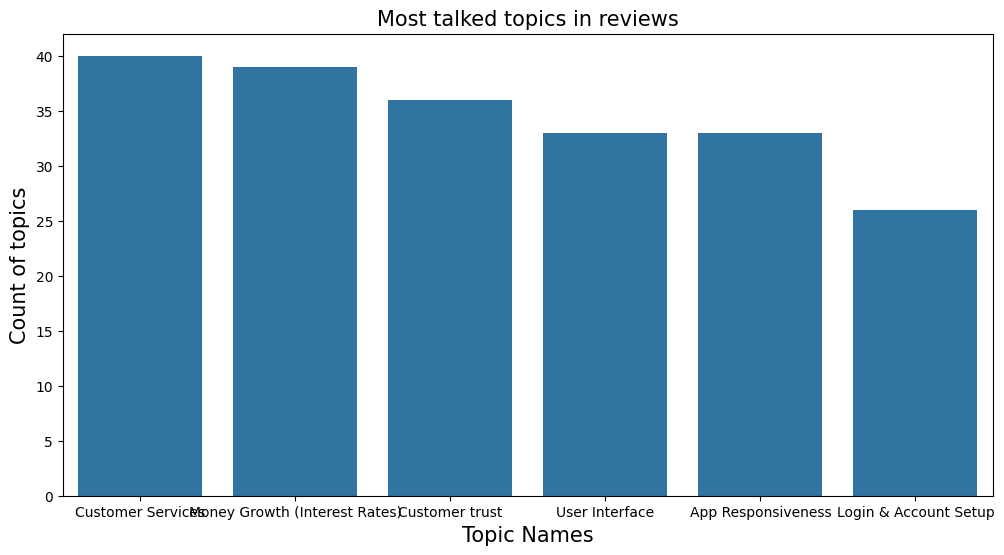

In [45]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[:6].index,y=review_data.Topic_Name.value_counts()[:6].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.xlabel('Topic Names',size=15)
plt.ylabel('Count of topics',size=15)
plt.title('Most talked topics in reviews',size=15)
plt.show()

From above graph we can say that most of customers had issues with Battery of mobile

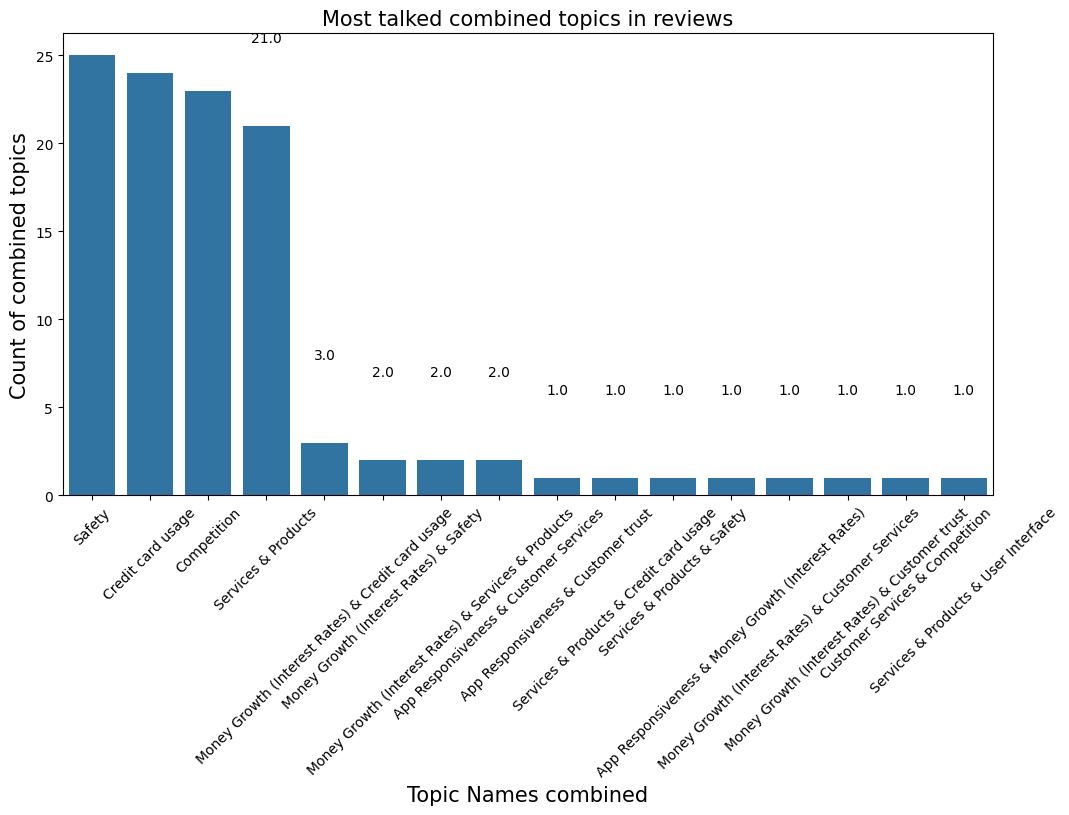

In [46]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=review_data.Topic_Name.value_counts()[6:].index,y=review_data.Topic_Name.value_counts()[6:].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+5),ha = 'center', va = 'center')
plt.xlabel('Topic Names combined',size=15)
plt.ylabel('Count of combined topics',size=15)
plt.title('Most talked combined topics in reviews',size=15)
plt.xticks(rotation=45)
plt.show()

From above graph we can say that most of customers had combined issues with,

Heating issue & Battery <br>
Camera, Sound & Battery <br>
turbo charger & Battery

### Extracting reviews of 5 topic(review of battery)

In [47]:
review_data.loc[review_data.Topic_Number.str.contains('5'),['review','Topic_Name']]\
.style.set_properties(subset=['review'], **{'width': '300px'})

,review,Topic_Name
21,Can try for saving money !! My money said they liked there,Credit card usage
28,Downloaded the app but doesnt seem to be able to sign up and got asked to stay tune after giving my phone number. I cant see the screens as presented in the app store. What is going on?,Credit card usage
30,No more long waits and tons of paperwork to open a bank account. Looking forward to how GXS can generate a stronger value proposition for consumers.,Credit card usage
41,"Brilliant app design, fast transactions, excellent rates. Keep up the good work! What more can I say?",Credit card usage
51,GXS touted a 3.48% interest in their savings pocket only to change the interest to 2.68% within a short period of only a month. A bank is only as good as it’s promises and this bank just lost it all. Will never use GXS again.,Money Growth (Interest Rates) & Credit card usage
58,Income extracted from SingPass is incorrect. Information in SingPass is correct Which means the process of extracting information needs to be updated.,Credit card usage
74,A whole new era of banking. Go GXS or go home! 💪🏼,Credit card usage
103,cant logging using finger print . previously still able to use . so pissed off with the update .,Services & Products & Credit card usage
118,I don't set. A password in my phone n not allow me to down load this apps,Credit card usage
124,I am unable to log in today when i could yesterday. I cant transfer my money out to use. There is no alternative like physical counter or website so my money is stuck when i urgently need my money.,Credit card usage


In [48]:
review_data.head()

,review,clean_review,Topic_Number,Topic_Name
0,Great banking app with attractive interest rat...,"[banking, interest, rate, please, payee, numbe...",4,User Interface
1,"A bank like no other, no bank have such amazin...","[bank, bank, feature, money, pocket, track, go...",4,User Interface
2,Notice that the drop in interest rate of 0.8% ...,"[notice, drop, interest, rate, account, reason...",1,Money Growth (Interest Rates)
3,Sending money into my GXS account is a breeze ...,"[money, account, breeze, amount, fund, money, ...",6,Login & Account Setup
4,I have to say that the UI/UX is one of the bes...,"[digibank, mobile, market, player, focus, cust...",4,User Interface


Problem  extraction for each reviews through the use of hugging face pipeline

In [13]:
from transformers import pipeline
qa_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [14]:
def report(review):
    #should return a dictionary i guess
    ans = dict.fromkeys(['Good', 'Suggested improvements'], [])
    ans['Good'] = qa_pipeline(question="What is good and positive about this application?", context=review)["answer"]
    ans['Suggested improvements'] = qa_pipeline(question="How can the pplication improve?", context=review)["answer"]
    return ans

In [15]:
print(report("Great banking app with attractive interest rates! Please allow us to add and/or save payees so we don‚Äôt have to keep typing out UEN numbers or account numbers. Would be nice to be able to add the debit card to Apple Pay too!!"))

{'Good': 'attractive interest rates', 'Suggested improvements': 'Would be nice to be able to add the debit card to Apple Pay'}


In [18]:
reviews_exmp = [
    "Great banking app with attractive interest rates! Please allow us to add and/or save payees so we don't have to keep typing out UEN numbers or account numbers. Would be nice to be able to add the debit card to Apple Pay too!!",
    "A bank like no other, no bank have such amazing feature to separate your money into different 'pockets' to keep track of your goals. Moreover the interest rate they give is the highest for the no effort! Interest are being deposit daily and it's amazing to see üíµ coming in to the bank daily!",
    "The user interfaces is so intuitive that every button can be found with your eyes close, that makes money transfer so much smoother. Also the colours is so slick that I want to turn the app on everyday just to look at it and see the daily interest",
    "Lots of potential for the product and I can't wait to see more of it.",
    "Notice that the drop in interest rate of 0.8% in saving accounts. GXS just come out with a reason to say many consumers want a increase in interest rate in main accounts as most of their funds are there to get the 1.2x points for dash and grab spending. Hence they decrease the interest rate to 2.68% in saving account and increase to 2.38% in main account .",
    "The thing is GXS can increase the main account interest and maintain the interest rate in saving account. They will attract more consumer in this case. However, they use this opportunity to decease the interest rate in saving account instead and use the consumer as an excuse for the decrease.",
    "I am very disappointed in GXS and have close my account in GXS. There are other banks offering a higher interest rate such as OCBC and UOB for saving accounts. No point sticking to GXS.",
    "Sending money into my GXS account is a breeze and instantaneous - regardless of the amounts. I'm able to immediately see that my funds are in GXS."
]

In [19]:
for review in reviews_exmp:
    print(report(review))

{'Good': 'attractive interest rates', 'Suggested improvements': 'Please allow us to add and/or save payees'}
{'Good': 'Interest are being deposit daily', 'Suggested improvements': 'Interest are being deposit daily'}
{'Good': 'The user interfaces', 'Suggested improvements': 'the colours is so slick'}
{'Good': 'Lots of potential for the product', 'Suggested improvements': 'Lots of potential for the product'}
{'Good': 'the drop in interest rate of 0.8% in saving accounts', 'Suggested improvements': 'increase to 2.38% in main account'}
{'Good': 'GXS can increase the main account interest', 'Suggested improvements': 'increase the main account interest and maintain the interest rate in saving account'}
{'Good': 'GXS', 'Suggested improvements': 'No point sticking to GXS'}
{'Good': 'Sending money', 'Suggested improvements': 'regardless of the amounts'}


In [51]:
#review_data.to_csv('/Users/blabbyduck/Desktop/Y3S2/DSA3101/DSA3101-Project/TopicsofReviews.csv')

NPS scoring

In [52]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize lists to store data
review_texts = []
positive_scores = []
negative_scores = []
neutral_scores = []
compound_scores = []
nps_indiv = []
nps_category = [] 

# Perform sentiment analysis and store scores in lists
for index, row in review_data.iterrows():
    review = row['review']
    vs = analyzer.polarity_scores(review)
    review_texts.append(review)
    positive_scores.append(vs['pos'])
    negative_scores.append(vs['neg'])
    neutral_scores.append(vs['neu'])
    compound_scores.append(vs['compound'])
    
    # Map compound scores to nps_indiv based on specified intervals
    if -1 <= vs['compound'] <= -9/11:
        nps_indiv.append(0)
    elif -9/11 < vs['compound'] <= -7/11:
        nps_indiv.append(1)
    elif -7/11 < vs['compound'] <= -5/11:
        nps_indiv.append(2)
    elif -5/11 < vs['compound'] <= -3/11:
        nps_indiv.append(3)
    elif -3/11 < vs['compound'] <= -1/11:
        nps_indiv.append(4)
    elif -1/11 < vs['compound'] <= 1/11:
        nps_indiv.append(5)
    elif 1/11 < vs['compound'] <= 3/11:
        nps_indiv.append(6)
    elif 3/11 < vs['compound'] <= 5/11:
        nps_indiv.append(7)
    elif 5/11 < vs['compound'] <= 7/11:
        nps_indiv.append(8)
    elif 7/11 < vs['compound'] <= 9/11:
        nps_indiv.append(9)
    else:
        nps_indiv.append(10)
    
    # Map nps_indiv scores to NPS categories
    if nps_indiv[-1] >= 9:  # Promoters
        nps_category.append('Promoter')
    elif nps_indiv[-1] >= 7:  # Passives
        nps_category.append('Passive')
    else:  # Detractors
        nps_category.append('Detractor')

# Create dataframe
score_df = pd.DataFrame({
    'Review': review_texts,
    'Positive Score': positive_scores,
    'Negative Score': negative_scores,
    'Neutral Score': neutral_scores,
    'Compound Score': compound_scores,
    'nps_indiv': nps_indiv,
    'nps_category': nps_category,
    'clean_review': review_data['clean_review'],
    'Topic_Number': review_data['Topic_Number'],
    'Topic_Name': review_data['Topic_Name']
})

# Display the dataframe
print(score_df)


                                                Review  Positive Score  \
0    Great banking app with attractive interest rat...           0.367   
1    A bank like no other, no bank have such amazin...           0.147   
2    Notice that the drop in interest rate of 0.8% ...           0.201   
3    Sending money into my GXS account is a breeze ...           0.059   
4    I have to say that the UI/UX is one of the bes...           0.141   
..                                                 ...             ...   
312  digital bank app does not work when it already...           0.000   
313  Not ready to roll out completely. Aint even al...           0.115   
314  Can not download yet, just always show pending...           0.000   
315  Looks cool and sleek! Can I get an invite if I...           0.208   
316  It's doesn't work, they're just trying to coll...           0.079   

     Negative Score  Neutral Score  Compound Score  nps_indiv nps_category  \
0             0.024          0.60

In [53]:
import pandas as pd
import numpy as np

def net_promoter_score(score_df, topic_column):
    topics = score_df[topic_column].unique()  # Get unique topics from the specified column
    topic_results = {}  # Dictionary to store results for each topic

    for topic in topics:
        # Filter the DataFrame for the current topic
        topic_df = score_df[score_df[topic_column] == topic]

        # Count the occurrences of each label
        label_counts = topic_df['nps_category'].value_counts()

         # Calculate Net Promoter Score (NPS)
        promoter_count = label_counts.get('Promoter', 0)
        detractor_count = label_counts.get('Detractor', 0)
        passive_count = label_counts.get('Passive', 0)
        total_count = promoter_count + detractor_count + passive_count

        # Calculate NPS
        nps = ((promoter_count - detractor_count) / total_count) * 100

        # Store the result for the current category
        topic_results[topic] = round(nps, 2)

        
    return topic_results


grouped_df = score_df.groupby('Topic_Name')
for name, group in grouped_df:
    print(f"Topic: {name}")
    print(group)
    print()

# Calculate the percentage difference by category
nps_score = net_promoter_score(score_df, 'Topic_Name')
# Convert the dictionary to a DataFrame for nicer presentation
nps_df = pd.DataFrame(nps_score.items(), columns=['Topic_Name', 'NPS_Score'])

# Display the NPS DataFrame
print("NPS Score by topic:")
print(nps_df)

Topic: App Responsiveness
                                                Review  Positive Score  \
5    Have been waiting for a slot for the account s...           0.206   
6    Great app, with awesome design and theme unlik...           0.265   
7    Hit with fast reversal when transferring money...           0.099   
9    What a joke! Nothing happens after you input y...           0.175   
16   I recently used this digital bank, which has m...           0.299   
23   Easy drawing and repayment option. Flexible of...           0.339   
40   The app is easy to navigate and optimise for p...           0.345   
46   Simple, straightforward to use with no bugs. G...           0.000   
50   Is GXS looking into this issue? Going to be a ...           0.094   
53   This is very good. Really very helpful. I Will...           0.466   
60   Loan disbursement was immediate. App is simple...           0.195   
70   Not prepared? Then don’t launch. See your dire...           0.209   
88          

In [54]:
#nps_df.to_csv('/Users/blabbyduck/Desktop/Y3S2/DSA3101/DSA3101-Project/nps_df.csv')

In [55]:
#score_df.to_csv('/Users/blabbyduck/Desktop/Y3S2/DSA3101/DSA3101-Project/score_df.csv')